In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# %matplotlib inline

root_path="/home/shishir/study/code/OpenCV/resource/"

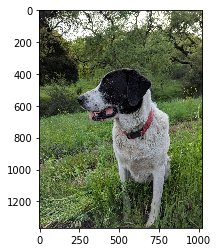

In [12]:
dog_img = cv2.imread(f'{root_path}/resource/sammy.jpg')
dog_img = cv2.cvtColor(dog_img, cv2.COLOR_BGR2RGB)
plt.imshow(dog_img)

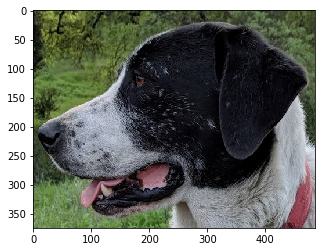

In [13]:
dog_face = cv2.imread(f'{root_path}/resource/sammy_face.jpg')
dog_face = cv2.cvtColor(dog_face, cv2.COLOR_BGR2RGB)
plt.imshow(dog_face)

In [18]:
method_list = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
              'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

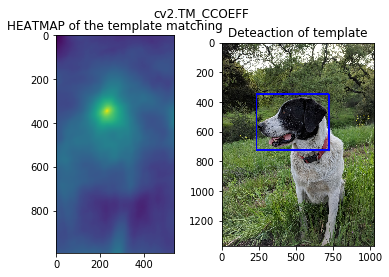

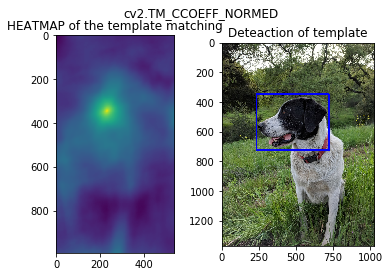

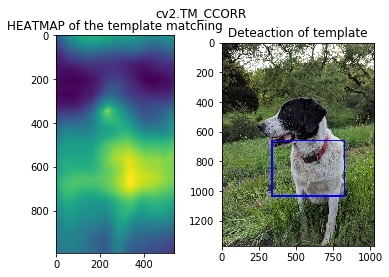

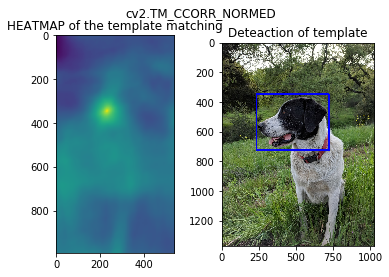

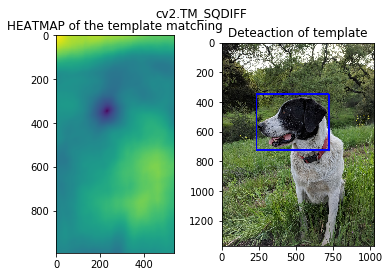

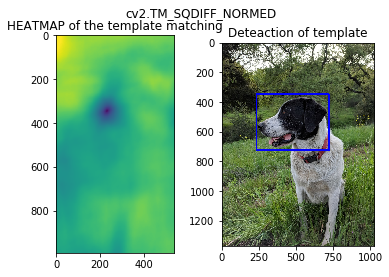

In [59]:
#size of the template should be same as the size of object 
# in original image

height, width, channel = dog_face.shape
top_left = bottom_right = (0,0)
for method in method_list:
    
    #creating copy of actual img
    img = dog_img.copy()
    
    # template  matching
    res  = cv2.matchTemplate(img, dog_face, eval(method))
    
    # getting min, max value  and location of min/max value
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # in 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED' min_value
    # will the coordinate where we got maximun match
    # for rest its inverse
    if method in ['cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']:
        top_left = min_loc
    else:
        top_left = max_loc
    
    cv2.rectangle(img,
                 top_left,
                 (top_left[0]+width, top_left[1]+height),
                 (0,0,255),
                 10)
    
#     plt.subplot(121)
#     plt.imshow(dog_img)
#     plt.title("original image")
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP of the template matching')
    
    plt.subplot(122)
    plt.imshow(img)
    plt.title('Deteaction of template')
    
    # Title with the method used
    plt.suptitle(method)
    
    plt.show()
    print('\n')
    